Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years
Administration -- spend on administration in the past few years
Marketing Spend -- spend on Marketing in the past few years
State -- states from which data is collected
Profit  -- profit of each state in the past few years


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
start = pd.read_csv("C:\\Users\\GANESH\\Downloads\\50_Startups.csv")
start.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
start.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
start.drop(columns = {'State'}, inplace = True)
start.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [5]:
start1=start.rename({'R&D Spend':'RDS','Administration':'ADM','Marketing Spend':'MS'},axis=1)
start1

,RDS,ADM,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


In [6]:
start1.describe()

,RDS,ADM,MS,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
start1.corr()

,RDS,ADM,MS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADM,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


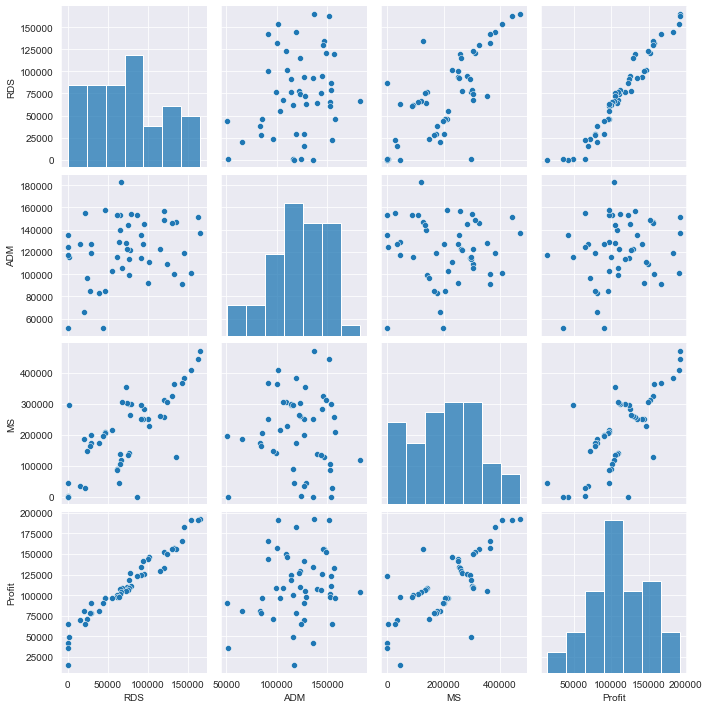

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(start1)

In [14]:
model=smf.ols("Profit~RDS+ADM+MS",data=start1).fit()
model.params

Intercept    50122.192990
RDS              0.805715
ADM             -0.026816
MS               0.027228
dtype: float64

In [11]:
model.tvalues,np.round(model.pvalues,5)

(Intercept     7.626218
 RDS          17.846374
 ADM          -0.525507
 MS            1.655077
 dtype: float64,
 Intercept    0.00000
 RDS          0.00000
 ADM          0.60176
 MS           0.10472
 dtype: float64)

In [13]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

SIMPLE LINEAR REGRESSION MODELS

In [15]:
ml_A=smf.ols('Profit~MS',data = start1).fit()  
#t and p-Values
print(ml_A.tvalues, '\n', ml_A.pvalues) 

Intercept    7.808356
MS           7.802657
dtype: float64 
 Intercept    4.294735e-10
MS           4.381073e-10
dtype: float64


In [16]:
ml_B=smf.ols('Profit~ADM',data = start1).fit()  
#t and p-Values
print(ml_A.tvalues, '\n', ml_B.pvalues) 

Intercept    7.808356
MS           7.802657
dtype: float64 
 Intercept    0.003824
ADM          0.162217
dtype: float64


In [17]:
ml_C=smf.ols('Profit~MS+ADM',data = start1).fit()  
#t and p-Values
print(ml_A.tvalues, '\n', ml_C.pvalues) 

Intercept    7.808356
MS           7.802657
dtype: float64 
 Intercept    2.589341e-01
MS           9.727245e-11
ADM          1.729198e-02
dtype: float64


C:\Users\GANESH\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


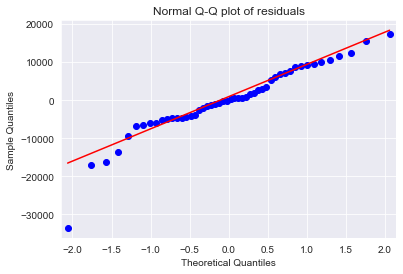

In [18]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [19]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

## Residual Plot for Homoscedasticity

In [20]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

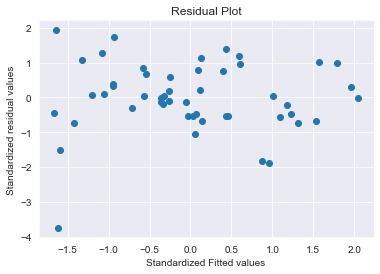

In [21]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

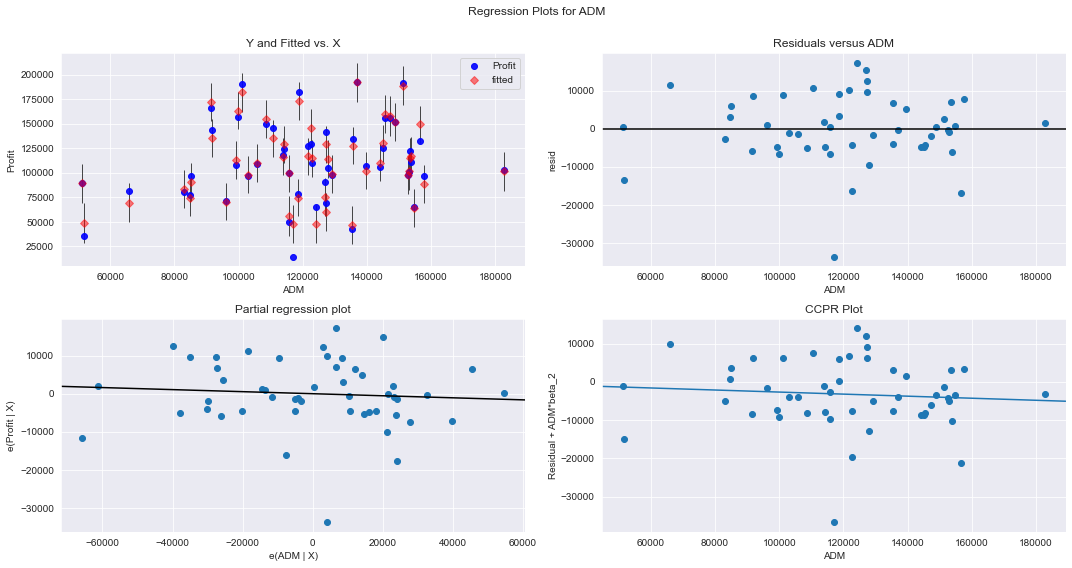

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "ADM", fig=fig)
plt.show()

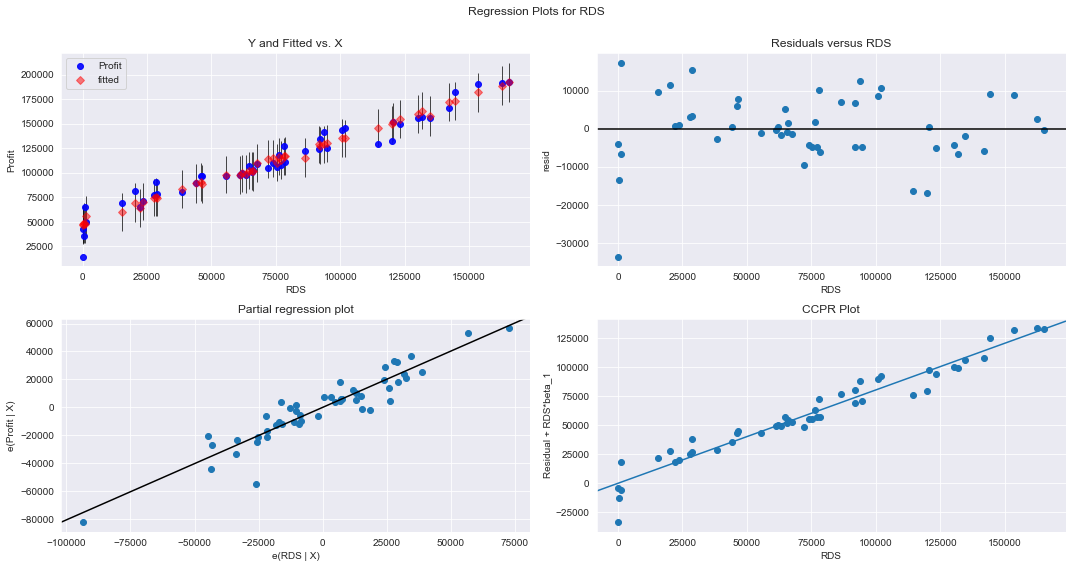

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [25]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

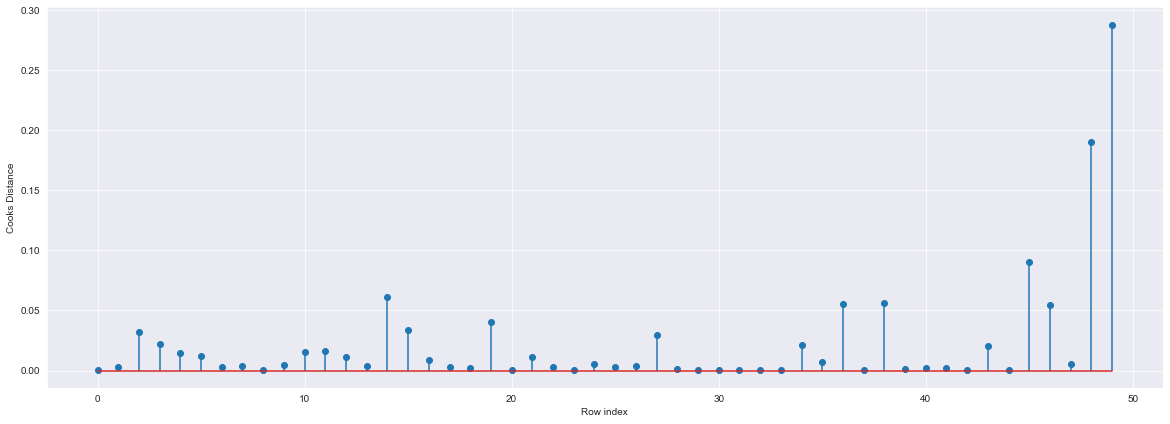

In [26]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(start1)), np.round(c, 5))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [27]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543267)

## High Influence points

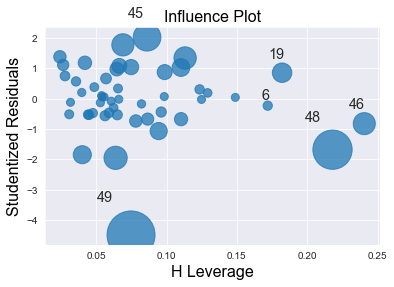

In [29]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [30]:
k = start1.shape[1]
n = start1.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [31]:
start1[start1.index.isin([48,49])]

,RDS,ADM,MS,Profit
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


In [32]:
start1.head()

,RDS,ADM,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Improving the model

In [33]:
#Discard the data points which are influencers and reasign the row number (reset_index())
start2=start1.drop(start1.index[[48,49]],axis=0).reset_index()

In [34]:
start2

,index,RDS,ADM,MS,Profit
0,0,165349.20,136897.80,471784.10,192261.83
1,1,162597.70,151377.59,443898.53,191792.06
2,2,153441.51,101145.55,407934.54,191050.39
3,3,144372.41,118671.85,383199.62,182901.99
4,4,142107.34,91391.77,366168.42,166187.94
5,5,131876.90,99814.71,362861.36,156991.12
6,6,134615.46,147198.87,127716.82,156122.51
7,7,130298.13,145530.06,323876.68,155752.60
8,8,120542.52,148718.95,311613.29,152211.77
9,9,123334.88,108679.17,304981.62,149759.96


In [35]:
#Drop the original index
start2=start2.drop(['index'],axis=1)
start2

,RDS,ADM,MS,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


# Build Model

In [36]:
final_ml_a=smf.ols('Profit~ADM+RDS',data = start2).fit()

In [37]:
(final_ml_a.rsquared,final_ml_a.aic)

(0.9613542664192156, 994.3402293693792)

In [38]:
final_ml_b=smf.ols('Profit~MS+RDS',data = start2).fit()

In [39]:
(final_ml_b.rsquared,final_ml_b.aic)

(0.9609119875752479, 994.886442942941)

In [40]:
model_influence_V = final_ml_a.get_influence()
(c_V, _) = model_influence_V.cooks_distance

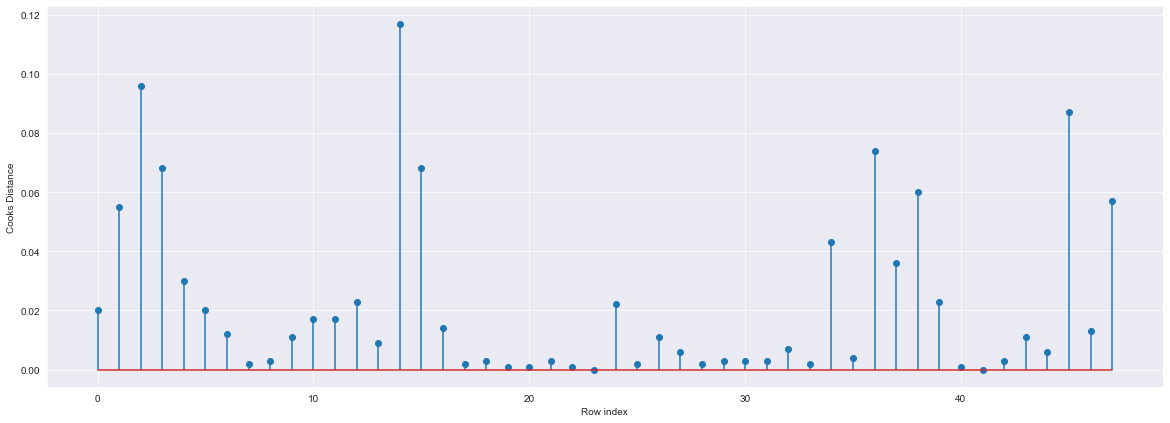

In [41]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(start2)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [42]:
#index of the data points where c is more than .5
(np.argmax(c_V),np.max(c_V))

(14, 0.11654464976722517)

In [43]:
final_ml_a=smf.ols('Profit~ADM+RDS',data = start2).fit()

In [44]:
final_ml_a.rsquared,'\n',final_ml_a.aic

(0.9613542664192156, '\n', 994.3402293693792)

In [45]:
new_data=pd.DataFrame({'RDS':70000,'ADM':90000,'MS':140000},index=[0])
new_data

,RDS,ADM,MS
0,70000,90000,140000


In [46]:
final_ml_a.predict(new_data)

0    112803.12255
dtype: float64

In [47]:
pred_y=final_ml_a.predict(start2)

In [48]:
pred_y

0     187340.464760
1     183863.887641
2     180534.893139
3     171604.420272
4     172024.525403
5     162900.562346
6     161186.859951
7     157773.804230
8     149478.810965
9     155129.052073
10    137340.484516
11    137893.497963
12    129316.175141
13    127091.776815
14    148330.209061
15    146711.212589
16    116751.658144
17    128482.338848
18    128676.601621
19    120997.283316
20    115951.175950
21    114367.406052
22    113345.516501
23    109453.840824
24    117822.625592
25    104263.757333
26    112655.711034
27    111367.236568
28    101797.017449
29    103909.390855
30    104068.445347
31    100259.360216
32    104095.492902
33     99772.679489
34     87736.121850
35     93479.452221
36     75684.497649
37     94706.610663
38     73860.287242
39     87517.154120
40     76471.551735
41     78595.585990
42     74135.495344
43     64829.306456
44     68023.684692
45     53162.943051
46     54120.360089
47     51395.923989
dtype: float64